## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

In [2]:
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [4]:
ipl_data = pd.read_csv('Dataset/ipl.csv')

## Dataset Info

In [5]:
ipl_data.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222


In [6]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
mid               76014 non-null int64
date              76014 non-null object
venue             76014 non-null object
bat_team          76014 non-null object
bowl_team         76014 non-null object
batsman           76014 non-null object
bowler            76014 non-null object
runs              76014 non-null int64
wickets           76014 non-null int64
overs             76014 non-null float64
runs_last_5       76014 non-null int64
wickets_last_5    76014 non-null int64
striker           76014 non-null int64
non-striker       76014 non-null int64
total             76014 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [7]:
ipl_data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [8]:
ipl_data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


# Data visualization

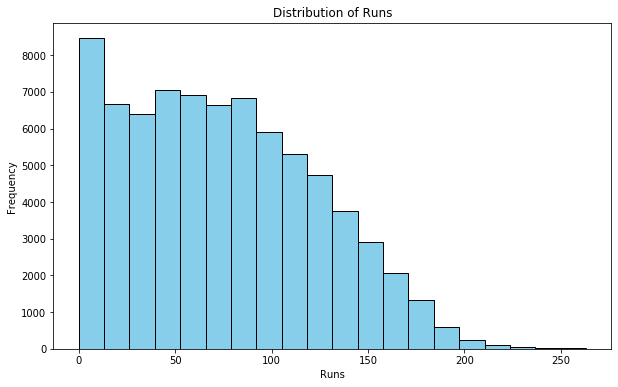

In [9]:
df = ipl_data
plt.figure(figsize=(10, 6))
plt.hist(df['runs'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title('Distribution of Runs')
plt.show()

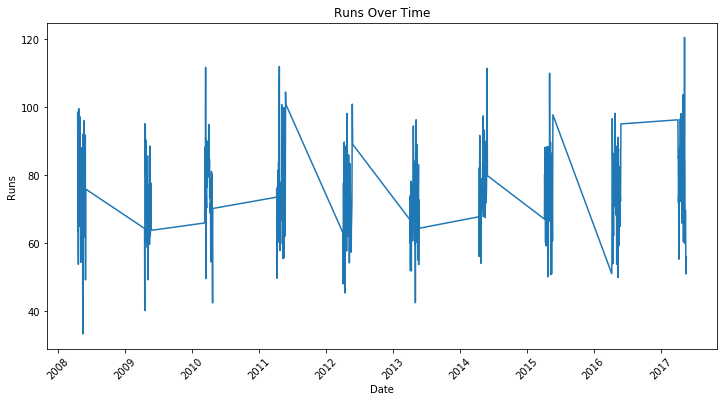

In [10]:
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' to datetime if not already
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='runs', data=df, ci=None)
plt.xlabel('Date')
plt.ylabel('Runs')
plt.title('Runs Over Time')
plt.xticks(rotation=45)
plt.show()

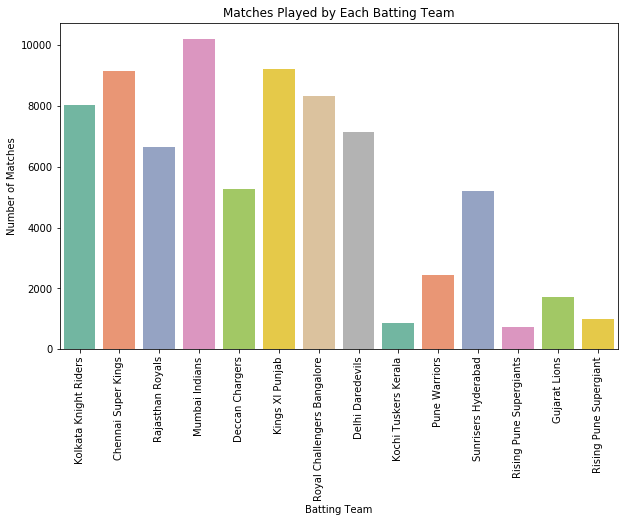

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bat_team', data=df, palette='Set2')
plt.xlabel('Batting Team')
plt.ylabel('Number of Matches')
plt.title('Matches Played by Each Batting Team')
plt.xticks(rotation=90)
plt.show()

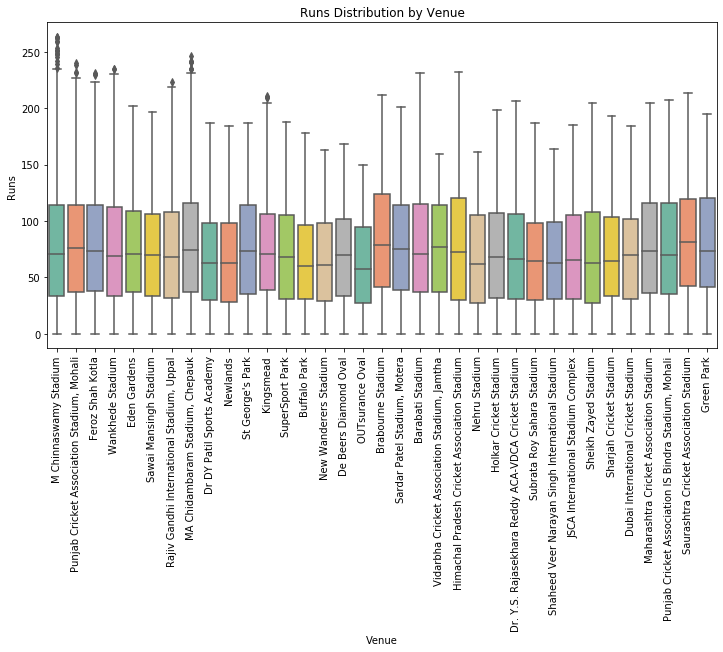

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='venue', y='runs', data=df, palette='Set2')
plt.xlabel('Venue')
plt.ylabel('Runs')
plt.title('Runs Distribution by Venue')
plt.xticks(rotation=90)
plt.show()

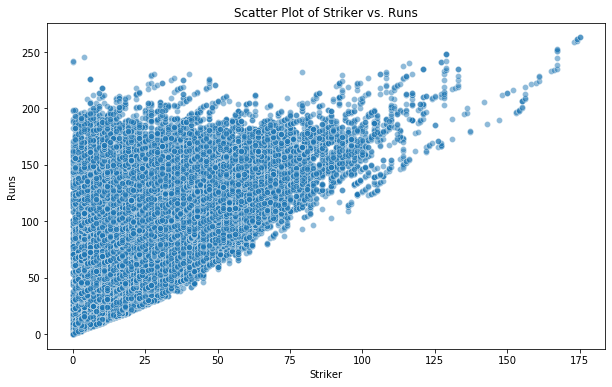

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='striker', y='runs', data=df, alpha=0.5)
plt.xlabel('Striker')
plt.ylabel('Runs')
plt.title('Scatter Plot of Striker vs. Runs')
plt.show()

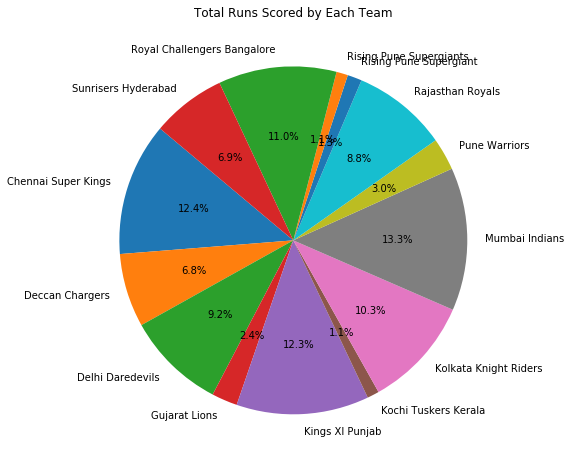

In [14]:
total_runs_by_team = df.groupby('bat_team')['runs'].sum()
plt.figure(figsize=(8, 8))
plt.pie(total_runs_by_team, labels=total_runs_by_team.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Runs Scored by Each Team')
plt.show()

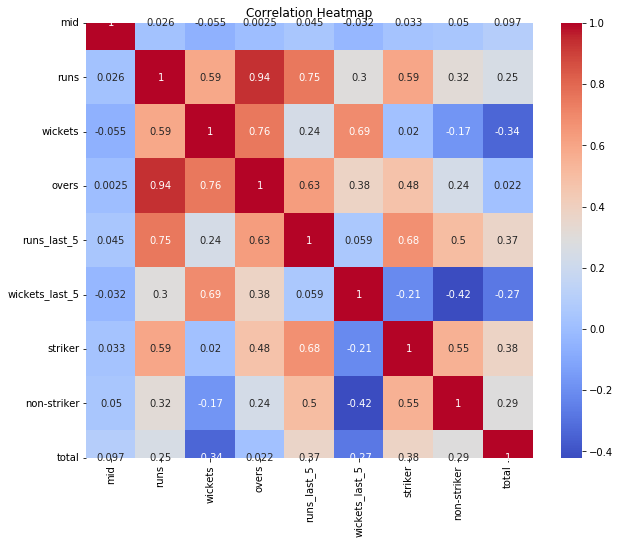

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

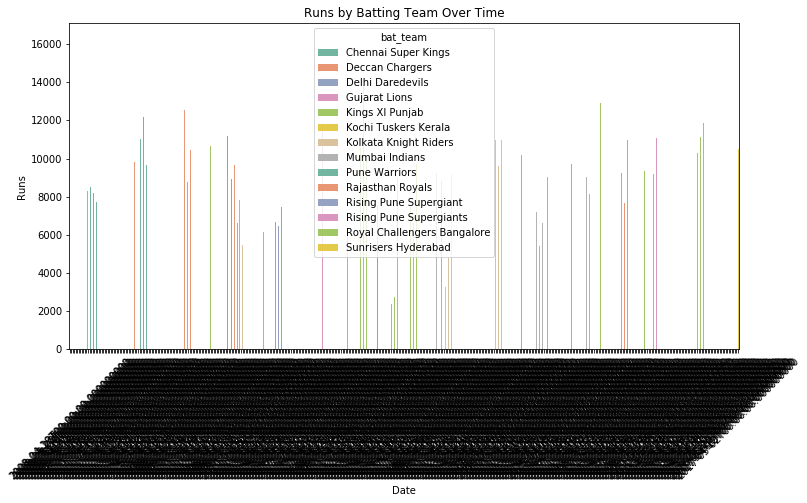

In [16]:
team_performance = df.groupby(['bat_team', 'date'])[['runs', 'wickets']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='date', y='runs', data=team_performance, hue='bat_team', palette='Set2')
plt.xlabel('Date')
plt.ylabel('Runs')
plt.title('Runs by Batting Team Over Time')
plt.xticks(rotation=45)
plt.show()

# Model Building

In [17]:
ipl_data = pd.read_csv('Dataset/ipl.csv')
column_delete=['mid','venue','batsman','bowler','striker','non-striker']
ipl_data.drop(labels=column_delete,axis=1,inplace=True)

current_team=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
        'Mumbai Indians', 'Kings XI Punjab',
        'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [18]:

ipl_data=ipl_data[(ipl_data['bat_team'].isin(current_team))&(ipl_data['bowl_team'].isin(current_team))]
ipl_data=ipl_data[ipl_data['overs']>=6.0]

ipl_data['date']=ipl_data['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
encoded_ipl=pd.get_dummies(data=ipl_data,columns=['bat_team','bowl_team'])
encoded_ipl=encoded_ipl[['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
        'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','total']]


# Train Test Split

In [19]:
x_train=encoded_ipl.drop(labels='total',axis=1)[encoded_ipl['date'].dt.year<=2016]
x_test=encoded_ipl.drop(labels='total',axis=1)[encoded_ipl['date'].dt.year>2016]

y_train=encoded_ipl[encoded_ipl['date'].dt.year<=2016]['total'].values
y_test=encoded_ipl[encoded_ipl['date'].dt.year>2016]['total'].values

x_train.drop(labels='date',axis=True,inplace=True)
x_test.drop(labels='date',axis=True,inplace=True)

In [20]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINING RESULTS: \n===============================")
    print(f"Mean Squared Error (MSE) on training data: {mean_squared_error(y_train, y_train_pred):.4f}")
    print(f"Mean Absolute Error (MAE) on training data: {mean_absolute_error(y_train, y_train_pred):.4f}")
    print(f"R-squared (R2) on training data: {r2_score(y_train, y_train_pred):.4f}")

    print("TESTING RESULTS: \n===============================")
    print(f"Mean Squared Error (MSE) on testing data: {mean_squared_error(y_test, y_test_pred):.4f}")
    print(f"Mean Absolute Error (MAE) on testing data: {mean_absolute_error(y_test, y_test_pred):.4f}")
    print(f"R-squared (R2) on testing data: {r2_score(y_test, y_test_pred):.4f}")

# Model Building

# Logistic Regression

In [21]:
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [22]:
evaluate(model, x_train, x_test, y_train, y_test)

TRAINING RESULTS: 
Mean Squared Error (MSE) on training data: 427.3849
Mean Absolute Error (MAE) on training data: 14.6544
R-squared (R2) on training data: 0.5116
TESTING RESULTS: 
Mean Squared Error (MSE) on testing data: 334.1254
Mean Absolute Error (MAE) on testing data: 13.9201
R-squared (R2) on testing data: 0.6690


In [23]:
predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 334.1253858024691
Mean Absolute Error (MAE): 13.92013888888889
R-squared: 0.6689827954911418


# Decision Tree

In [24]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [25]:
evaluate(model, x_train, x_test, y_train, y_test)

TRAINING RESULTS: 
Mean Squared Error (MSE) on training data: 0.0896
Mean Absolute Error (MAE) on training data: 0.0060
R-squared (R2) on training data: 0.9999
TESTING RESULTS: 
Mean Squared Error (MSE) on testing data: 568.5467
Mean Absolute Error (MAE) on testing data: 17.5397
R-squared (R2) on testing data: 0.4367


In [26]:
predictions = model.predict(x_test)

mse1 = mean_squared_error(y_test, predictions)
mae1 = mean_absolute_error(y_test, predictions)
r21 = r2_score(y_test, predictions)


print("Mean Squared Error (MSE):", mse1)
print("Mean Absolute Error (MAE):", mae1)
print("R-squared:", r21)

Mean Squared Error (MSE): 568.5466820987655
Mean Absolute Error (MAE): 17.539737654320987
R-squared: 0.43674218919606245


# SVM

In [27]:
model = SVR()
model.fit(x_train, y_train)

SVR()

In [28]:
evaluate(model, x_train, x_test, y_train, y_test)

TRAINING RESULTS: 
Mean Squared Error (MSE) on training data: 349.9950
Mean Absolute Error (MAE) on training data: 14.0881
R-squared (R2) on training data: 0.6001
TESTING RESULTS: 
Mean Squared Error (MSE) on testing data: 351.3137
Mean Absolute Error (MAE) on testing data: 14.3352
R-squared (R2) on testing data: 0.6520


In [29]:
predictions = model.predict(x_test)

mse2 = mean_squared_error(y_test, predictions)
mae2 = mean_absolute_error(y_test, predictions)
r22 = r2_score(y_test, predictions)


print("Mean Squared Error (MSE):", mse2)
print("Mean Absolute Error (MAE):", mae2)
print("R-squared:", r22)

Mean Squared Error (MSE): 351.31366087685336
Mean Absolute Error (MAE): 14.33520950775955
R-squared: 0.6519544133112389


# Naive Bayes

In [30]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [31]:
evaluate(model, x_train, x_test, y_train, y_test)

TRAINING RESULTS: 
Mean Squared Error (MSE) on training data: 1858.2082
Mean Absolute Error (MAE) on training data: 33.5079
R-squared (R2) on training data: -1.1233
TESTING RESULTS: 
Mean Squared Error (MSE) on testing data: 1899.4244
Mean Absolute Error (MAE) on testing data: 36.1566
R-squared (R2) on testing data: -0.8818


In [32]:
predictions = model.predict(x_test)

mse3 = mean_squared_error(y_test, predictions)
mae3 = mean_absolute_error(y_test, predictions)
r23 = r2_score(y_test, predictions)


print("Mean Squared Error (MSE):", mse3)
print("Mean Absolute Error (MAE):", mae3)
print("R-squared:", r23)

Mean Squared Error (MSE): 1899.4243827160494
Mean Absolute Error (MAE): 36.15663580246913
R-squared: -0.8817551017040499


# Linear Regression

In [33]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [34]:
evaluate(model, x_train, x_test, y_train, y_test)

TRAINING RESULTS: 
Mean Squared Error (MSE) on training data: 283.7339
Mean Absolute Error (MAE) on training data: 12.6036
R-squared (R2) on training data: 0.6758
TESTING RESULTS: 
Mean Squared Error (MSE) on testing data: 230.2836
Mean Absolute Error (MAE) on testing data: 11.6955
R-squared (R2) on testing data: 0.7719


In [35]:
predictions = model.predict(x_test)

mse4 = mean_squared_error(y_test, predictions)
mae4 = mean_absolute_error(y_test, predictions)
r24 = r2_score(y_test, predictions)


print("Mean Squared Error (MSE):", mse4)
print("Mean Absolute Error (MAE):", mae4)
print("R-squared:", r24)

Mean Squared Error (MSE): 230.28360399418804
Mean Absolute Error (MAE): 11.695460753505209
R-squared: 0.7718585953733966


# Random Forest

In [36]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [37]:
evaluate(model, x_train, x_test, y_train, y_test)

TRAINING RESULTS: 
Mean Squared Error (MSE) on training data: 5.7692
Mean Absolute Error (MAE) on training data: 1.3373
R-squared (R2) on training data: 0.9934
TESTING RESULTS: 
Mean Squared Error (MSE) on testing data: 341.1674
Mean Absolute Error (MAE) on testing data: 13.7938
R-squared (R2) on testing data: 0.6620


In [38]:
predictions = model.predict(x_test)

mse5 = mean_squared_error(y_test, predictions)
mae5 = mean_absolute_error(y_test, predictions)
r25 = r2_score(y_test, predictions)


print("Mean Squared Error (MSE):", mse5)
print("Mean Absolute Error (MAE):", mae5)
print("R-squared:", r25)

Mean Squared Error (MSE): 341.16744107582093
Mean Absolute Error (MAE): 13.79376639660494
R-squared: 0.6620062485131764


# KNN

In [39]:
model = KNeighborsRegressor(n_neighbors=2)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [40]:
evaluate(model, x_train, x_test, y_train, y_test)

TRAINING RESULTS: 
Mean Squared Error (MSE) on training data: 22.9820
Mean Absolute Error (MAE) on training data: 1.4224
R-squared (R2) on training data: 0.9737
TESTING RESULTS: 
Mean Squared Error (MSE) on testing data: 443.6487
Mean Absolute Error (MAE) on testing data: 15.7535
R-squared (R2) on testing data: 0.5605


In [41]:
predictions = model.predict(x_test)

mse6 = mean_squared_error(y_test, predictions)
mae6 = mean_absolute_error(y_test, predictions)
r26 = r2_score(y_test, predictions)


print("Mean Squared Error (MSE):", mse6)
print("Mean Absolute Error (MAE):", mae6)
print("R-squared:", r26)

Mean Squared Error (MSE): 443.64872685185185
Mean Absolute Error (MAE): 15.753472222222221
R-squared: 0.5604782887307069


# Voting Regressor

In [42]:
r1 = LinearRegression()
r2 = SVR()
model = VotingRegressor([('lr', r1), ('rf', r2)])
model.fit(x_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()), ('rf', SVR())])

In [43]:
evaluate(model, x_train, x_test, y_train, y_test)

TRAINING RESULTS: 
Mean Squared Error (MSE) on training data: 298.3470
Mean Absolute Error (MAE) on training data: 12.7586
R-squared (R2) on training data: 0.6591
TESTING RESULTS: 
Mean Squared Error (MSE) on testing data: 268.5751
Mean Absolute Error (MAE) on testing data: 12.4209
R-squared (R2) on testing data: 0.7339


In [44]:
predictions = model.predict(x_test)

mse7 = mean_squared_error(y_test, predictions)
mae7 = mean_absolute_error(y_test, predictions)
r27 = r2_score(y_test, predictions)


print("Mean Squared Error (MSE):", mse7)
print("Mean Absolute Error (MAE):", mae7)
print("R-squared:", r27)

Mean Squared Error (MSE): 268.5750732323248
Mean Absolute Error (MAE): 12.420877665828671
R-squared: 0.7339233302234498


# Comparison

In [45]:
results ={'Mean squared error': [mse,mse1,mse2,mse3,mse4,mse5,mse6,mse7],
 'Mean absolute error':[mae,mae1,mae2,mae3,mae4,mae5,mae6,mae7],
 'R2': [r2,r21,r22,r23,r24,r25,r26,r27]}
index = ['Logistic Regression','Decision Tree','SVM','Naive Bayes','Linear Regression','Random Forest','KNN','Voting Regessor']

In [46]:
results =pd.DataFrame(results,index=index)
print(results)

                     Mean squared error  Mean absolute error        R2
Logistic Regression          334.125386            13.920139     SVR()
Decision Tree                568.546682            17.539738  0.436742
SVM                          351.313661            14.335210  0.651954
Naive Bayes                 1899.424383            36.156636 -0.881755
Linear Regression            230.283604            11.695461  0.771859
Random Forest                341.167441            13.793766  0.662006
KNN                          443.648727            15.753472  0.560478
Voting Regessor              268.575073            12.420878  0.733923


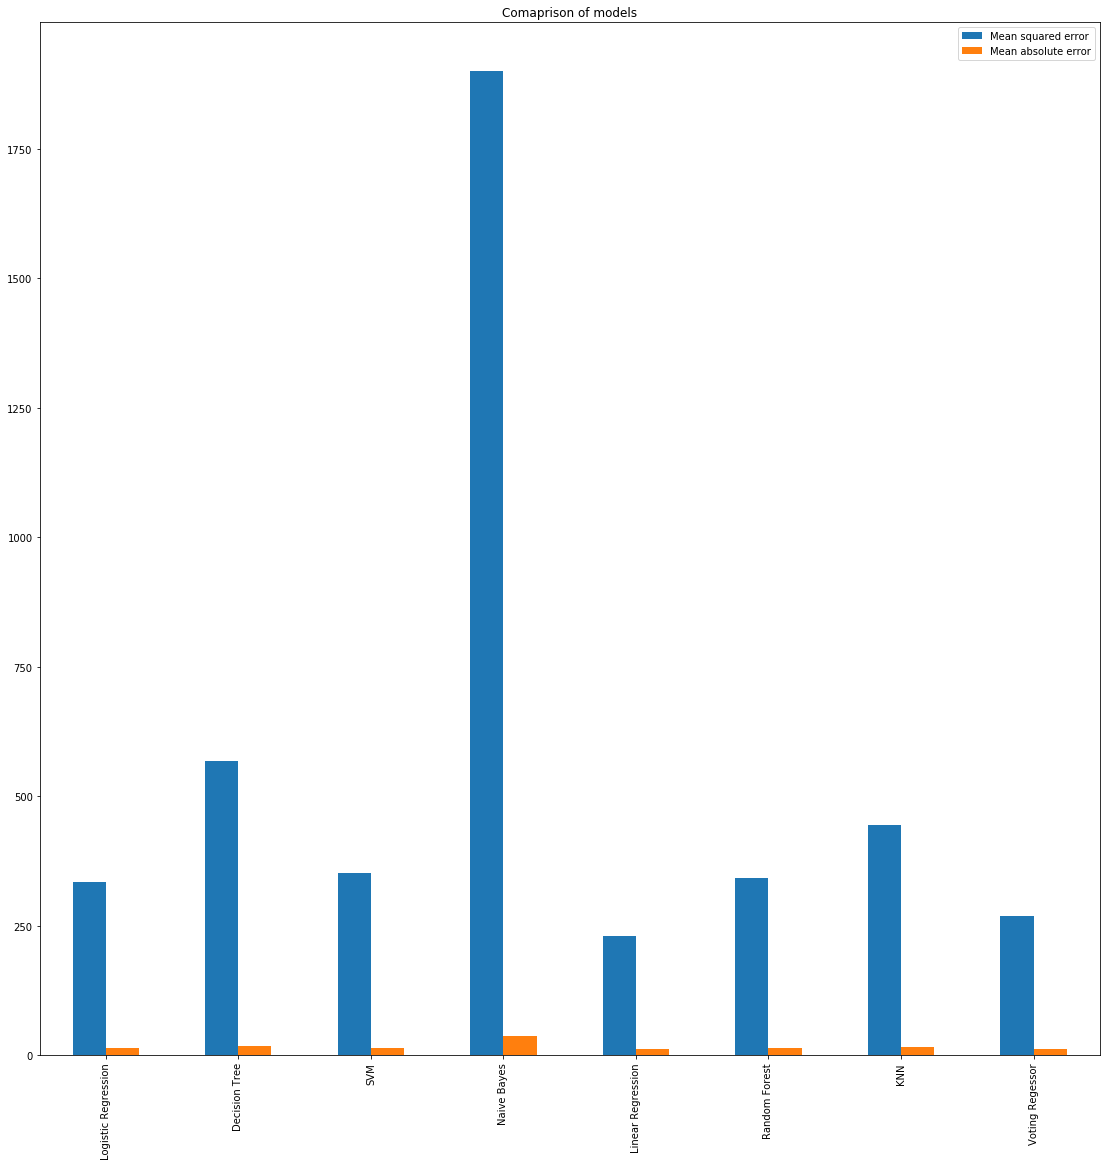

In [47]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF85D01A88>,
      dtype=object)

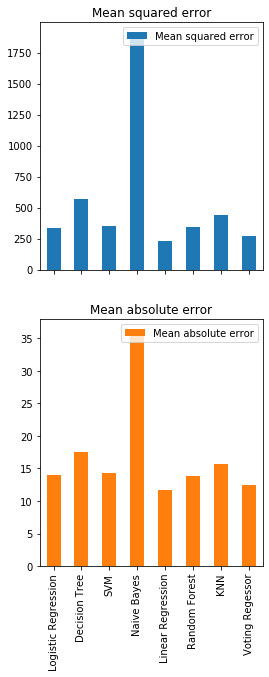

In [48]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))

# Saving the model

In [49]:
pickle.dump(model, open('model/model.pkl', 'wb'))